In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint


## Dataset of Sold Players in IPL Auctions for year 2013-2023, including their Names, Nationality, Sold-out price,Type of Player & IPL Team which bought them. Data Scraped from IPL website (as per the dataset description)

#### Link: https://www.kaggle.com/datasets/sunayanagawde/ipl-2023-auction-dataset?select=IPL_Sold_players_2013_23.csv


In [2]:
# Importing Data

df= pd.read_csv("IPL_Sold_players_2013_23.csv")

In [3]:
display(df.head())

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       965 non-null    int64 
 1   Name         965 non-null    object
 2   Nationality  965 non-null    object
 3   Type         965 non-null    object
 4   Team         965 non-null    object
 5   Price        965 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.4+ KB


In [5]:
# Checking if any record is containing NULL

display(df.isnull().sum())

Season         0
Name           0
Nationality    0
Type           0
Team           0
Price          0
dtype: int64

### => No value is NULL

In [6]:
q1=df.query("Nationality=='Not Available'")
display(q1)

,Season,Name,Nationality,Type,Team,Price
284,2021,Tom Curran,Not Available,All-Rounder,Delhi Capitals,"5,25,00,000"
285,2021,Steven Smith,Not Available,Batsman,Delhi Capitals,"2,20,00,000"
290,2021,Lukman Hussain Meriwala,Not Available,Bowler,Delhi Capitals,"20,00,000"
291,2021,M Siddharth,Not Available,Bowler,Delhi Capitals,"20,00,000"
293,2021,Harbhajan Singh,Not Available,Bowler,Kolkata Knight Riders,"2,00,00,000"
...,...,...,...,...,...,...
958,2013,Christopher Barnwell,Not Available,All-Rounder,Royal Challengers Bangalore,"50,000"
960,2013,Darren Sammy,Not Available,All-Rounder,Sunrisers Hyderabad,"425,000"
961,2013,Sudeep Tyagi,Not Available,Bowler,Sunrisers Hyderabad,"100,000"
962,2013,Clinton McKay,Not Available,Bowler,Sunrisers Hyderabad,"100,000"


### => But we can see there are many players whose Nationality is Not Available``

In [7]:
print(df['Season'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013]


### => This is a dataset of these years ipl auction

In [8]:
pprint(df['Team'].unique())

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bangalore', ' Sunrisers Hyderabad',
       ' Kings XI Punjab', 'Kings XI Punjab', 'Delhi Daredevils',
       'Gujarat Lions', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Rajasthan Royals',
       'Pune Warriors India'], dtype=object)


## Here we can see some names are repeated or some names of teams have been changed. So to avoid confusion, Team name should be the present one.

In [9]:
df.replace(' Chennai Super Kings','Chennai Super Kings',inplace=True)
df.replace(' Delhi Capitals','Delhi Capitals',inplace=True)
df.replace(' Gujarat Titans','Gujarat Titans',inplace=True)
df.replace(' Kolkata Knight Riders','Kolkata Knight Riders',inplace=True)
df.replace(' Lucknow Super Giants','Lucknow Super Giants',inplace=True)
df.replace(' Mumbai Indians','Mumbai Indians',inplace=True)
df.replace(' Punjab Kings','Punjab Kings',inplace=True)
df.replace(' Rajasthan Royals','Rajasthan Royals',inplace=True)
df.replace(' Royal Challengers Bangalore','Royal Challengers Bangalore',inplace=True)
df.replace(' Sunrisers Hyderabad','Sunrisers Hyderabad',inplace=True)
df.replace(' Kings XI Punjab','Punjab Kings',inplace=True)
df.replace('Kings XI Punjab','Punjab Kings',inplace=True)
df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df.replace('Gujarat Lions','Gujarat Titans',inplace=True)
df.replace('Gujarat Lions','Gujarat Titans',inplace=True)

In [10]:
pprint(df['Team'].unique())
print(len(df['Team'].unique()))

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Pune Warriors India'], dtype=object)
12


### Hence 12 Unique Teams

## As Price column is in Object data type, we are changing it to Int datatype so that it can be used in calculations.

In [11]:
df['Price']=df['Price'].str.replace(',','').astype('int64')

In [12]:
display(df)

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,5000000
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,2000000
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,2000000
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,6000000
...,...,...,...,...,...,...
960,2013,Darren Sammy,Not Available,All-Rounder,Sunrisers Hyderabad,425000
961,2013,Sudeep Tyagi,Not Available,Bowler,Sunrisers Hyderabad,100000
962,2013,Clinton McKay,Not Available,Bowler,Sunrisers Hyderabad,100000
963,2013,Nathan McCullum,Not Available,Bowler,Sunrisers Hyderabad,100000


### =>Hence Changed

In [13]:
print(df['Type'].unique())

['Batter ' 'All-Rounder ' 'Bowler ' 'Wicket-Keeper ' 'Batsman '
 'Wicket Keeper ' ' All-Rounder ' 'Bowler' ' Bowler ' ' Wicket Keeper'
 'Batsman' 'All-Rounder' 'Wicket Keeper']


## Here we can see there are many records which are of same kind, so we need to make them one
#### ex. Wicket-Keeper = Wicket Keeper

In [14]:
df.replace('All-Rounder ',"All-Rounder",inplace=True)
df.replace(' All-Rounder ',"All-Rounder",inplace=True)
df.replace('Batter ',"Batsman",inplace=True)
df.replace('Batsman ',"Batsman",inplace=True)
df.replace('Bowler ','Bowler',inplace=True)
df.replace(' Bowler ',"Bowler",inplace=True)
df.replace('Wicket-Keeper ',"Wicket-Keeper",inplace=True)
df.replace('Wicket Keeper ',"Wicket-Keeper",inplace=True)
df.replace(' Wicket Keeper ',"Wicket-Keeper",inplace=True)
df.replace(' Wicket Keeper',"Wicket-Keeper",inplace=True)
df.replace('Wicket Keeper',"Wicket-Keeper",inplace=True)

In [15]:
print(df['Type'].unique())
print(len(df['Type'].unique()))

['Batsman' 'All-Rounder' 'Bowler' 'Wicket-Keeper']
4


### => Hence, 4 unique types

## Total Money Expended in IPL auction on players each Season

In [16]:
display(df.pivot_table(index="Season",aggfunc="sum"))

,Price
Season,
2013,10600000
2014,2418000000
2015,835000000
2016,1050000000
2017,771000000
2018,3912000000
2019,1016000000
2020,1258500000
2021,1279500000


In [18]:
## Auction in each year

yr=int(input("Enter the year of which you want to see ipl auction (2013-2023): "))
display(df.query(f"Season== {yr}").sort_values("Team"))

Enter the year of which you want to see ipl auction (2013-2023): 2014


,Season,Name,Nationality,Type,Team,Price
794,2014,Dinesh Karthik,Indian,Wicket-Keeper,Delhi Capitals,125000000
816,2014,Milind Kumar,Not Available,Batsman,Delhi Capitals,1000000
815,2014,HS Sharath,Not Available,Bowler,Delhi Capitals,1000000
814,2014,Jayant Yadav,Indian,All-Rounder,Delhi Capitals,1000000
812,2014,Siddarth Kaul,Indian,Bowler,Delhi Capitals,4500000
...,...,...,...,...,...,...
912,2014,Amit Mishra,Indian,Bowler,Sunrisers Hyderabad,47500000
911,2014,David Warner,Overseas,Batsman,Sunrisers Hyderabad,55000000
931,2014,Chama Milind,Indian,Bowler,Sunrisers Hyderabad,1000000
920,2014,KL Rahul,Not Available,Batsman,Sunrisers Hyderabad,10000000


## Expenditure of each time season wise

In [19]:
display(df.groupby(["Season","Team"])[["Price"]].sum())

Price
Season Team                                  
2013   Delhi Capitals                  760000
       Kolkata Knight Riders           675000
       Mumbai Indians                 2000000
       Pune Warriors India            2500000
       Punjab Kings                    800000
...                                       ...
2023   Mumbai Indians               205000000
       Punjab Kings                 200000000
       Rajasthan Royals              98500000
       Royal Challengers Bangalore   70000000
       Sunrisers Hyderabad          357000000

[84 rows x 1 columns]

## The most expensive player of each team season wise

In [20]:
display(df.groupby(["Season","Team"])[["Price"]].max())

Price
Season Team                                  
2013   Delhi Capitals                  450000
       Kolkata Knight Riders           625000
       Mumbai Indians                 1000000
       Pune Warriors India             725000
       Punjab Kings                    500000
...                                       ...
2023   Mumbai Indians               175000000
       Punjab Kings                 185000000
       Rajasthan Royals              57500000
       Royal Challengers Bangalore   32000000
       Sunrisers Hyderabad          132500000

[84 rows x 1 columns]

## Money Spent till now by each Team

In [21]:
display(df.pivot_table(index="Team",values="Price",aggfunc="sum").sort_values("Price"))

,Price
Team,
Pune Warriors India,2500000
Rising Pune Supergiant,390000000
Chennai Super Kings,640000000
Lucknow Super Giants,788000000
Gujarat Titans,871500000
Mumbai Indians,1927000000
Rajasthan Royals,2080130000
Kolkata Knight Riders,2169175000
Delhi Capitals,2541760000


## Number of each type of players every season

In [22]:
display(df.groupby(["Season","Type"])[["Type"]].value_counts())

Season  Type         
2013    All-Rounder      13
        Batsman           4
        Bowler           13
        Wicket-Keeper     2
2014    All-Rounder      30
        Batsman          33
        Bowler           60
        Wicket-Keeper    16
2015    All-Rounder      23
        Batsman          13
        Bowler           19
        Wicket-Keeper     4
2016    All-Rounder      33
        Batsman           8
        Bowler           31
        Wicket-Keeper     8
2017    All-Rounder      19
        Batsman          11
        Bowler           25
        Wicket-Keeper     2
2018    All-Rounder      52
        Batsman          32
        Bowler           51
        Wicket-Keeper    12
2019    All-Rounder      25
        Batsman           9
        Bowler           17
        Wicket-Keeper     7
2020    All-Rounder      24
        Batsman          12
        Bowler           16
        Wicket-Keeper     6
2021    All-Rounder      25
        Batsman           4
        Bowler           1

## Number of players according to Type, season wise, the team which you want

In [23]:
team=input("Enter team name: ").title()
display(df.query(f"Team=='{team}'").groupby(["Season","Type"])[["Type"]].value_counts())

Enter team name: Punjab Kings


Season  Type         
2013    Batsman           1
        Bowler            1
2014    All-Rounder       7
        Batsman           5
        Bowler            8
        Wicket-Keeper     1
2015    All-Rounder       1
        Batsman           1
        Wicket-Keeper     1
2016    All-Rounder       4
        Batsman           1
        Bowler            3
2017    All-Rounder       2
        Batsman           3
        Bowler            3
2018    All-Rounder       6
        Batsman           7
        Bowler            7
2019    All-Rounder       7
        Bowler            4
        Wicket-Keeper     2
2020    All-Rounder       5
        Bowler            3
        Wicket-Keeper     1
2021    All-Rounder       7
        Bowler            2
2022    All-Rounder      11
        Batsman           2
        Bowler            7
        Wicket-Keeper     3
2023    All-Rounder       4
        Batsman           1
        Bowler            1
dtype: int64

## Maximum money Spent on each Type till now

,Price
Type,
Bowler,140000000
Batsman,160000000
Wicket-Keeper,160000000
All-Rounder,185000000


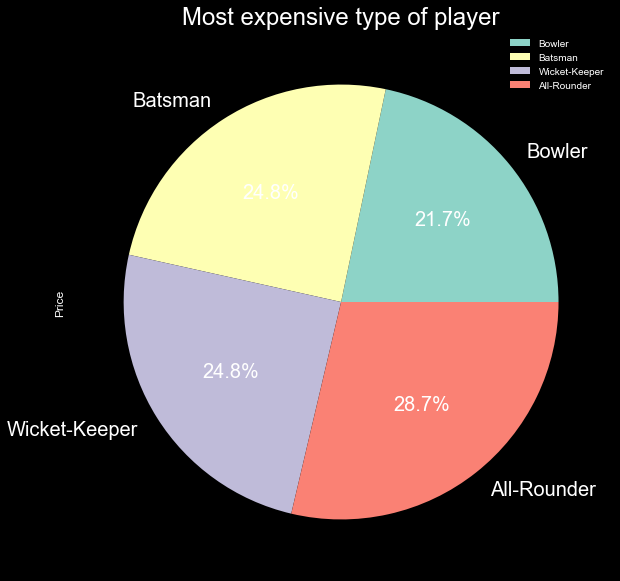

,Season,Name,Nationality,Type,Team,Price
49,2023,Sam Curran,Overseas,All-Rounder,Punjab Kings,185000000
735,2015,Yuvraj Singh,Indian,Batsman,Delhi Capitals,160000000
83,2022,Deepak Chahar,Indian,Bowler,Chennai Super Kings,140000000
307,2021,Jhye Richardson,Overseas,Bowler,Punjab Kings,140000000
28,2023,Nicholas Pooran,Overseas,Wicket-Keeper,Lucknow Super Giants,160000000


In [55]:
expensive=df.groupby(["Type"])[["Price"]].max().sort_values("Price")
display(expensive)
plt.style.use('dark_background')
expensive.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,10),fontsize=20)
plt.title("Most expensive type of player",fontsize=24)
plt.show()

result = pd.DataFrame(columns=["Season",	"Name",	"Nationality",	"Type",	"Team",	"Price"])
typeGroup = df.groupby(["Type"])
for group in typeGroup.groups.keys():
    temp = typeGroup.get_group(group)[typeGroup.get_group(group)['Price'] ==  typeGroup.get_group(group)['Price'].max()]
    result = pd.concat([result, temp])
display(result)



## Number of players according to Nationality 

Not Available    418
Indian           376
Overseas         171
Name: Nationality, dtype: int64


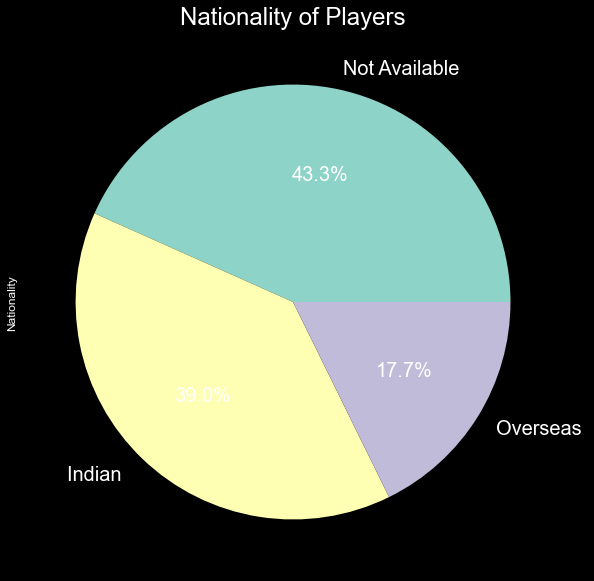

In [59]:
nation=df["Nationality"].value_counts()
print(nation)

nation.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,10),fontsize=20)
plt.title("Nationality of Players",fontsize=24)
plt.show()

## Number of players according to Nationality in each Season

In [26]:
display(df.groupby(["Season"])[["Nationality"]].value_counts())

Season  Nationality  
2013    Not Available     28
        Overseas           3
        Indian             1
2014    Not Available     92
        Indian            38
        Overseas           9
2015    Not Available     39
        Indian            14
        Overseas           6
2016    Not Available     55
        Indian            19
        Overseas           6
2017    Not Available     34
        Indian            15
        Overseas           8
2018    Not Available     79
        Indian            52
        Overseas          16
2019    Not Available     32
        Indian            18
        Overseas           8
2020    Not Available     33
        Indian            17
        Overseas           8
2021    Not Available     26
        Indian            14
        Overseas          11
2022    Indian           137
        Overseas          67
2023    Indian            51
        Overseas          29
dtype: int64

## Comparison of Total money Spent in each Season of a Team

Enter team name: punjab kings


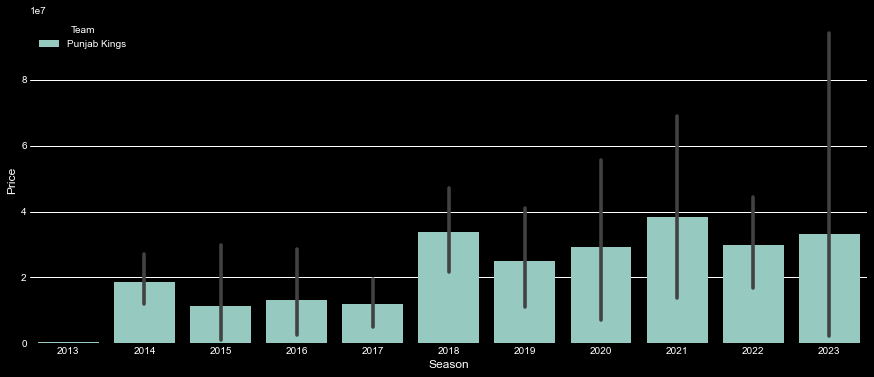

In [57]:
# Barplot on Expenditure of a team each season

tm=input("Enter team name: ").title()
plt.figure(figsize=(15,6))
hyu=df.query(f"Team=='{tm}'")
hyu
sns.barplot(y="Price",x="Season",data=hyu,hue='Team')
plt.show()

## Comaprison of total expenditure of teams in a season

Enter Season: 2016


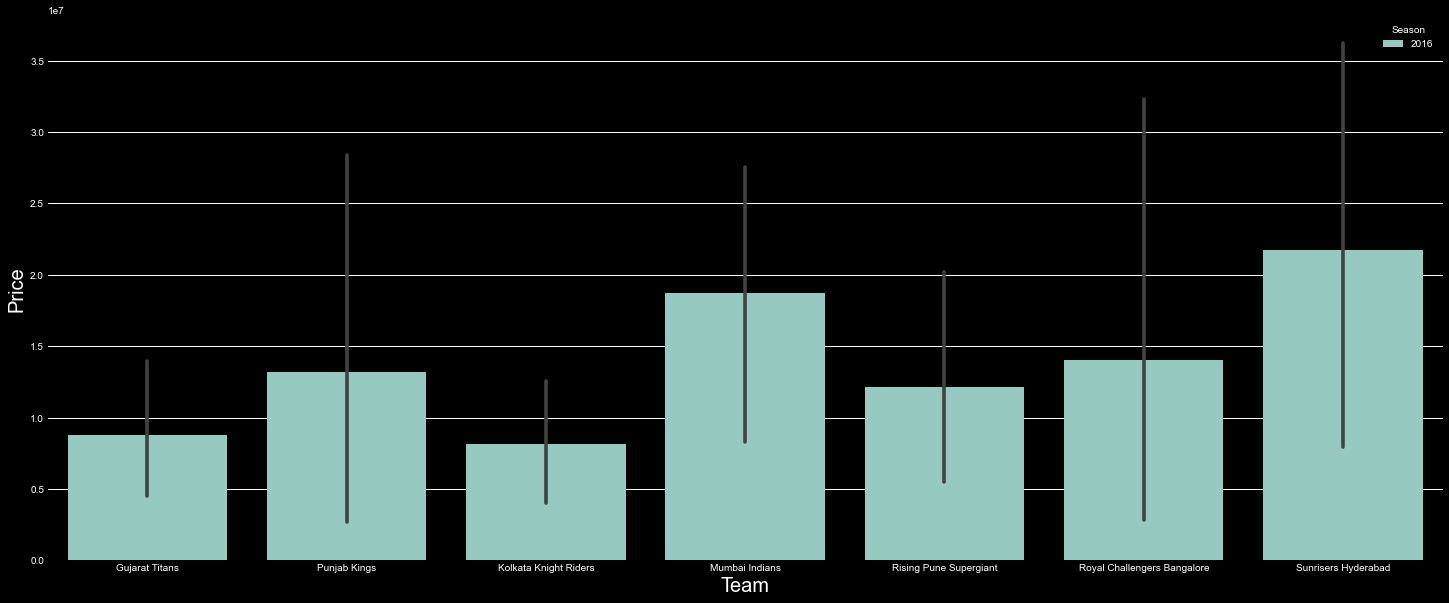

In [60]:
yr=int(input("Enter Season: "))
hy=df.query(f"Season=={yr}")
plt.figure(figsize=(25,10))
figg=sns.barplot(x='Team',y='Price',data=hy,hue='Season')
figg.set_xlabel('Team',size = 20 )
figg.set_ylabel('Price',size = 20 )
plt.show()